## **Income Qualification**

#Problem Statement

Many social programs have a hard time ensuring that the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of the population can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to
classify them and predict their level of need.

While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

The Inter-American Development Bank (IDB)believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train_data=pd.read_csv('train.csv')
train_data

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.00,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.00,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.00,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.00,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.00,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,2,2,1,2,3,1,4,5,5,5,9,NaN,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,d6c086aa3,1,4,0,5,.25,9,

In [5]:
test_data=pd.read_csv('test.csv')
test_data

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.50,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.2500,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.50,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.2500,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.50,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.2500,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5b598fbc9,0,1,0,1,no,16,no,16.00,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.00,0.00,256.0000,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,8,no,11,NaN,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.25,64.00,NaN,324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23851,ID_a065a7cad,NaN,1,2,1,1,1,0,NaN,0,2,2,1,3,4,1,5,6,6,6,3,0.0,6,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,3aa78c56b,2,4,0,6,.5,5,no,5.75,0,1,0,0,0,0,0,0,0,1,6.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,10,9,100,36,25,4,36.00,0.25,33.0625,100
23852,ID_1a

In [6]:
train_data.shape

(9557, 143)

In [7]:
test_data.shape

(23856, 142)

#Identify the output variable.

In [8]:
for i in train_data.columns:
    if i not in test_data.columns:
        print(i)

Target


The output variable is Target variable in train data

# Understand the type of data.

In [9]:
train_data.Target.value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

This is a classification data with 4 classes

In [10]:
train_data.describe(include='all')

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,9557,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.0,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557,9557.000000,9557.000000,9557.000000,9557.000000,9557,9557,9557,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
unique,9557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2988,NaN,NaN,NaN,NaN,31,22,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_279628684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [11]:
print(train_data.dtypes.value_counts())

int64      130
float64      8
object       5
dtype: int64


we have 130 columns with int64 data type, 8 columsn with float64 data type, and 5 columns with object data type

In [12]:
train_data.describe(exclude=('int64','float64'))

,Id,idhogar,dependency,edjefe,edjefa
count,9557,9557,9557,9557,9557
unique,9557,2988,31,22,22
top,ID_279628684,fd8a6d014,yes,no,no
freq,1,13,2192,3762,6230


There is no use of Id and idhogar for our predictions as they are unique codes which are difficult to convert to numerical values. So we can remove them  

In [13]:
idhogar=train_data.idhogar

In [14]:
train_data.drop(['Id','idhogar'],axis=1, inplace=True)

In [15]:
train_data['dependency'].value_counts()

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
.40000001      84
1.3333334      84
2.5            77
5              24
1.25           18
3.5            18
.80000001      18
2.25           13
.71428573      12
1.75           11
1.2            11
.83333331      11
.22222222      11
.2857143        9
1.6666666       8
.60000002       8
6               7
.16666667       7
Name: dependency, dtype: int64

In [16]:
train_data['edjefe'].value_counts()

no     3762
6      1845
11      751
9       486
3       307
15      285
8       257
7       234
5       222
14      208
17      202
2       194
4       137
16      134
yes     123
12      113
10      111
13      103
21       43
18       19
19       14
20        7
Name: edjefe, dtype: int64

In [17]:
train_data['edjefe']=train_data['edjefe'].replace('no',0)
train_data['edjefe']=train_data['edjefe'].replace('yes',1)
test_data['edjefe']=test_data['edjefe'].replace('no',0)
test_data['edjefe']=test_data['edjefe'].replace('yes',1)

In [18]:
train_data['edjefa'].value_counts()


no     6230
6       947
11      399
9       237
8       217
15      188
7       179
5       176
3       152
4       136
14      120
16      113
10       96
2        84
17       76
12       72
yes      69
13       52
21        5
19        4
18        3
20        2
Name: edjefa, dtype: int64

In [19]:
train_data['edjefa']=train_data['edjefa'].replace('no',0)
train_data['edjefa']=train_data['edjefa'].replace('yes',1)
test_data['edjefa']=test_data['edjefa'].replace('no',0)
test_data['edjefa']=test_data['edjefa'].replace('yes',1)

In [20]:
train_data['dependency']=train_data['dependency'].replace('yes',1)
test_data['dependency']=test_data['dependency'].replace('yes',1)

In [21]:
train_data['dependency']=train_data['dependency'].replace('no',0)
test_data['dependency']=test_data['dependency'].replace('no',0)

In [22]:
train_data['dependency'].value_counts()

1            2192
0            1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
.40000001      84
1.3333334      84
2.5            77
5              24
1.25           18
3.5            18
.80000001      18
2.25           13
.71428573      12
1.75           11
1.2            11
.83333331      11
.22222222      11
.2857143        9
1.6666666       8
.60000002       8
6               7
.16666667       7
Name: dependency, dtype: int64

converting object data types into float values

In [23]:
train_data['dependency']=train_data['dependency'].astype('float64')
train_data['edjefa']=train_data['edjefa'].astype('float64')
train_data['edjefe']=train_data['edjefe'].astype('float64')
print(train_data.dtypes.value_counts())

int64      130
float64     11
dtype: int64


In [24]:
test_data['dependency']=test_data['dependency'].astype('float64')
test_data['edjefa']=test_data['edjefa'].astype('float64')
test_data['edjefe']=test_data['edjefe'].astype('float64')
print(test_data.dtypes.value_counts())

int64      129
float64     11
object       2
dtype: int64


identifiying variables with 0 variance and removing them as they have no use for our classification

In [25]:
variances = train_data.var()
zero_variance_columns = variances[variances == 0].index
print(zero_variance_columns)

Index(['elimbasu5'], dtype='object')


In [26]:
train_data.drop('elimbasu5',axis=1,inplace=True)
test_data.drop('elimbasu5',axis=1,inplace=True)

#Check if there are any biases in your dataset.

In [27]:
contingency_tab=pd.crosstab(train_data['r4t3'],train_data['hogar_total'])
Observed_Values=contingency_tab.values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_tab)
Expected_Values = b[3]
no_of_rows=len(contingency_tab.iloc[0:2,0])
no_of_columns=len(contingency_tab.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
alpha=0.05
critical_value=chi2.ppf(q=1-alpha,df=df)
print('critical_value:',critical_value)
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Degree of Freedom:- 1
chi-square statistic:- 17022.072400560897
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 17022.072400560897
critical_value: 3.841458820694124
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [28]:
contingency_tab=pd.crosstab(train_data['v18q'],train_data['v18q1'])
Observed_Values=contingency_tab.values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_tab)
Expected_Values = b[3]
no_of_rows=len(contingency_tab.iloc[0:2,0])
no_of_columns=len(contingency_tab.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
alpha=0.05
critical_value=chi2.ppf(q=1-alpha,df=df)
print('critical_value:',critical_value)
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Degree of Freedom:- 0
chi-square statistic:- 0.0
critical_value: nan
p-value: nan
Significance level:  0.05
Degree of Freedom:  0
chi-square statistic: 0.0
critical_value: nan
p-value: nan
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


In [29]:
contingency_tab=pd.crosstab(train_data['tipovivi3'],train_data['v2a1'])
Observed_Values=contingency_tab.values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_tab)
Expected_Values = b[3]
no_of_rows=len(contingency_tab.iloc[0:2,0])
no_of_columns=len(contingency_tab.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
alpha=0.05
critical_value=chi2.ppf(q=1-alpha,df=df)
print('critical_value:',critical_value)
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Degree of Freedom:- 1
chi-square statistic:- 54.04781105990782
critical_value: 3.841458820694124
p-value: 1.9562129693895258e-13
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 54.04781105990782
critical_value: 3.841458820694124
p-value: 1.9562129693895258e-13
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


Therefore, there is bias in our dataset

#Count how many null values are existing in columns

In [30]:
null_columns=train_data.select_dtypes(['int64','float64']).isnull().sum()
null_columns[null_columns>0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

There are 6860 null values in v2a1(Monthly rent payment) column, 7342 nulls in v18q1(number of tablets household owns) column, 7928 nulls in rez_esc(Years behind in school) column, 5 nulls in meaneduc(average years of education for adults (18+)) column, and 5 nulls in SQBmeaned(square of the mean years of education of adults (>=18) in the household 142) column

#Dealing with null values

Dealing with v2a1 column: From the above bias analysis, it is clear that v2a1 and tipovivi3 are related. tipovivi1, =1 own and fully paid house,
tipovivi2, "=1 own,  paying in installments",
tipovivi3, =1 rented,
tipovivi4, =1 precarious ,
tipovivi5, "=1 other(assigned,  borrowed)"

In [31]:
df1=train_data[train_data['v2a1'].isnull()]
a=df1[['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']]
a

,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
2,1,0,0,0,0
13,1,0,0,0,0
14,1,0,0,0,0
26,1,0,0,0,0
32,1,0,0,0,0
...,...,...,...,...,...
9542,1,0,0,0,0
9543,1,0,0,0,0
9544,1,0,0,0,0
9550,1,0,0,0,0


In [32]:
a.tipovivi1.value_counts()

1    5911
0     949
Name: tipovivi1, dtype: int64

In [33]:
a.tipovivi2.value_counts()

0    6860
Name: tipovivi2, dtype: int64

In [34]:
a.tipovivi3.value_counts()

0    6860
Name: tipovivi3, dtype: int64

In [35]:
a.tipovivi4.value_counts()

0    6697
1     163
Name: tipovivi4, dtype: int64

In [36]:
a.tipovivi5.value_counts()

0    6074
1     786
Name: tipovivi5, dtype: int64

From the above analysis, it is clear that if the house is owned then we don't have to pay rent at all. So replacing nan values with 0.

In [37]:
for df in [train_data,test_data]:
    df['v2a1'].fillna(value=0, inplace=True)
train_data['v2a1'].isnull().sum()

0

From the bias analysis v18q1 and v18q are related i.e no of tablets household owns and owns a tablet

In [38]:
df=train_data[train_data['parentesco1']==1]
df.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

v18q
0    2318
1       0
Name: v18q1, dtype: int64

From this we can say that when owns a tablet is 0, then no of tablets owned by a household is also 0. So we can replace the null values with 0.

In [39]:
for df in [train_data, test_data]:
    df['v18q1'].fillna(value=0, inplace=True)

train_data[['v18q1']].isnull().sum()

v18q1    0
dtype: int64

Now lets resolve the null values in the rez_esc column. The rez_esc column is dependent on the age column. rez_esc is "years behind school".

In [40]:
train_data['rez_esc'].value_counts()

0.0    1211
1.0     227
2.0      98
3.0      55
4.0      29
5.0       9
Name: rez_esc, dtype: int64

In [41]:
train_data[train_data['rez_esc'].notnull()]['age'].describe()

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

For the notnull values minimum is 7 and the max is 17

In [42]:
train_data[train_data['rez_esc'].isnull()]['age'].describe()

count    7928.000000
mean       38.833249
std        20.989486
min         0.000000
25%        24.000000
50%        38.000000
75%        54.000000
max        97.000000
Name: age, dtype: float64

In [43]:
train_data.loc[(train_data['rez_esc'].isnull() & ((train_data['age'] > 7) & (train_data['age'] < 17)))]['age'].describe()

count     1.0
mean     10.0
std       NaN
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
Name: age, dtype: float64

In [44]:
train_data.loc[(train_data['age']==10)& (train_data['rez_esc'].isnull())]

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
2514,160000.0,0,6,0,1,1,1,1.0,0,1,1,1,1,2,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,2,0,3,0.5,11.0,0.0,13.5,1,0,0,0,0,0,0,0,0,2,1.5,0,1,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,10,0,100,9,121,1,2.25,0.25,182.25,100,4


There is only one record where the age is 10 and the rez_esc is nan. Which means only one member in the household with the age 10 and behind the school, which should be 0.

In [45]:
for df in [train_data, test_data]:
    df['rez_esc'].fillna(value=0, inplace=True)

train_data[['rez_esc']].isnull().sum()

rez_esc    0
dtype: int64

Now lets resolve the meaneduc column which has 5 nan values. meaneduc is the average number of education years for members above 18+ age. The column is related to edjefe : years of education of male head of household,
edjefa : years of education of female head of household, instlevel1 : no level of education, instlevel2 : incomplete primary

In [46]:
train_data['meaneduc'].describe()

count    9552.000000
mean        9.231523
std         4.167694
min         0.000000
25%         6.000000
50%         9.000000
75%        11.600000
max        37.000000
Name: meaneduc, dtype: float64

In [47]:
train_data[train_data['meaneduc'].isnull()][['edjefe','edjefa','instlevel1','instlevel2']]

,edjefe,edjefa,instlevel1,instlevel2
1291,0.0,10.0,0,0
1840,4.0,0.0,0,0
1841,4.0,0.0,0,1
2049,12.0,0.0,0,0
2050,12.0,0.0,0,0


From the above analysis we can say that for the meaneduc column having nan values the instlevel1 value is 0. so replace the nan values with 0

In [48]:
train_data['meaneduc'].fillna(value=0, inplace=True)
test_data['meaneduc'].fillna(value=0, inplace=True)
train_data['meaneduc'].isnull().sum()

0

Lets resolve the SQBmeaned column which has 5 null values. The column is square of the mean years of education of adults (>=18) in the
household. The column is related to edjefe : years of education of male head of household, edjefa : years of education of female head of household, instlevel1 : no level of education, instlevel2 : incomplete primary


In [49]:
train_data[train_data['SQBmeaned'].isnull()][['edjefe','edjefa','instlevel1','instlevel2']]

,edjefe,edjefa,instlevel1,instlevel2
1291,0.0,10.0,0,0
1840,4.0,0.0,0,0
1841,4.0,0.0,0,1
2049,12.0,0.0,0,0
2050,12.0,0.0,0,0


From the above analysis we can say that for the SQBmeaned column having nan values the instlevel1 value is 0. so replace the nan values with 0

In [50]:
train_data['SQBmeaned'].fillna(value=0, inplace=True)
test_data['SQBmeaned'].fillna(value=0, inplace=True)
train_data['SQBmeaned'].isnull().sum()

0

#4.)Check whether all members of the house have the same poverty level.

Useful dictionary
1.)Target - the target is an ordinal variable indicating groups of income levels.
1 = extreme poverty 2 = moderate poverty 3 = vulnerable households 4 = non vulnerable households
2.)idhogar - this is a unique identifier for each household. This can be used to create household-wide features, etc. All rows in a given household will have a matching value for this identifier.
3.)parentesco1 - indicates if this person is the head of the household.

In [51]:
train_data['idhogar']=idhogar.values

In [52]:
len(train_data['idhogar'].unique())

2988

In [53]:

a=train_data.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
a1 = a[a != True]

In [54]:
print(len(a1))

85


There are 85 houses where the members have different poverty levels

#Check if there is a house without a family head.

In [55]:
train_data['parentesco1']

0       1
1       1
2       1
3       0
4       0
       ..
9552    1
9553    0
9554    0
9555    0
9556    0
Name: parentesco1, Length: 9557, dtype: int64

In [56]:
households_head = train_data.groupby('idhogar')['parentesco1'].sum()
households_head

idhogar
001ff74ca    1
003123ec2    1
004616164    1
004983866    1
005905417    1
            ..
ff9343a35    1
ff9d5ab17    1
ffae4a097    1
ffe90d46f    1
fff7d6be1    1
Name: parentesco1, Length: 2988, dtype: int64

In [57]:
households_head.value_counts()

1    2973
0      15
Name: parentesco1, dtype: int64

From the above analysis there are 15 households with no head

#Set poverty level of the members and the head of the house within a family.

In [58]:
#households where the target is not samea
for household in a1.index:
    # Find the correct label (for the head of household)
    true_target = int(train_data[(train_data['idhogar'] == household) & (train_data['parentesco1'] == 1.0)]['Target'])

    # Set the correct label for all members in the household
    train_data.loc[train_data['idhogar'] == household, 'Target'] = true_target


In [59]:
# Groupby the household and figure out the number of unique values
a =train_data.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
a1 = a[a != True]
print(len(a1))

0


we have set the poverty level of the members and head of the house within a family. Therefore there are 0 people within a family having different poverty level.

#Predict the accuracy using random forest classifier.

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
train_data

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,idhogar
0,190000.0,0,3,0,1,1,0,0.0,0,1,1,0,0,0,0,1,1,1,1,10,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.00,10.0,0.0,10.00,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4,21eb7fcc1
1,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,8.00,12.0,0.0,12.00,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4,0e5d7a658
2,0.0,0,8,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,1,11,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,8.00,0.0,11.0,11.00,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4,2c7317ea8
3,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,2,0,4,1.00,11.0,0.0,11.00,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0000,121.0000,289,4,2b58d945f
4,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,4,1.00,11.0,0.0,11.00,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4,2b58d945f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,80000.0,0,6,0,1,1,0,0.0,0,2,2,1,2,3,1,4,5,5,5,9,0.0,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4,0,5,0.25,9.0,0.0,8.25,0,0,0,1,0,0,0,0,0,4,1.250000,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,1,46,81,2116,25,81,1,1.

In [61]:
from numba import test
X_data=train_data.drop(['idhogar','Target'],axis=1)
Y_data=train_data.Target.values

In [62]:
X_train,X_test,Y_train,Y_test=train_test_split(X_data,Y_data,test_size=0.2,random_state=10)
print(X_train.shape,X_test.shape)

(7645, 139) (1912, 139)


In [63]:
RF_classifier=RandomForestClassifier()
RF_classifier.fit(X_train,Y_train)

RandomForestClassifier()

In [64]:
y_pred=RF_classifier.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,ConfusionMatrixDisplay
print(accuracy_score(Y_test,y_pred))

0.9335774058577406


In [66]:
print(confusion_matrix(Y_test,y_pred))

[[ 129    2    1   24]
 [   2  261    1   44]
 [   0    2  189   41]
 [   3    4    3 1206]]


In [67]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           1       0.96      0.83      0.89       156
           2       0.97      0.85      0.90       308
           3       0.97      0.81      0.89       232
           4       0.92      0.99      0.95      1216

    accuracy                           0.93      1912
   macro avg       0.96      0.87      0.91      1912
weighted avg       0.94      0.93      0.93      1912



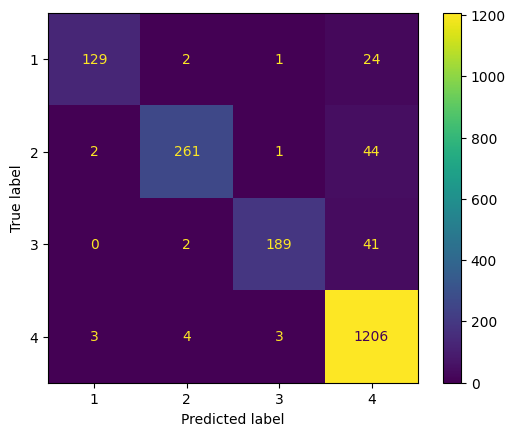

In [68]:
cm = confusion_matrix(Y_test, y_pred, labels=RF_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RF_classifier.classes_)
disp.plot()
plt.show()

In [69]:
pd.Series(Y_test).value_counts()

4    1216
2     308
3     232
1     156
dtype: int64

Testing on new data(actual test data)

In [70]:
test_data.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
                    ...   
SQBhogar_nin         int64
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq                int64
Length: 141, dtype: object

In [71]:
y_pred_testing=RF_classifier.predict(test_data.drop(['Id','idhogar'],axis=1))
y_pred_testing

array([4, 4, 4, ..., 4, 4, 4])

#Check the accuracy using random forest with cross validation.

In [72]:
from sklearn.model_selection import KFold,cross_val_score

lets initialize the Kfold cross validation

In [73]:
kfold=KFold(n_splits=5,random_state=1,shuffle=True)

Lets try with 20 trees

In [74]:
RF_classifier=RandomForestClassifier(n_estimators=20, random_state=1,n_jobs = -1)
print(cross_val_score(RF_classifier,X_data,Y_data,cv=kfold,scoring='accuracy'))

[0.93043933 0.93514644 0.93615908 0.93197279 0.9277865 ]


In [75]:
results=cross_val_score(RF_classifier,X_data,Y_data,cv=kfold,scoring='accuracy')
print("Mean accuracy is ",results.mean()*100)

Mean accuracy is  93.23008282811033


Lets try with 70 trees

In [76]:
RF_classifier=RandomForestClassifier(n_estimators=70, random_state=1,n_jobs = -1)
print(cross_val_score(RF_classifier,X_data,Y_data,cv=kfold,scoring='accuracy'))

[0.93933054 0.93566946 0.93720565 0.9314495  0.93877551]


In [77]:
results=cross_val_score(RF_classifier,X_data,Y_data,cv=kfold,scoring='accuracy')
print("Mean accuracy is ",results.mean()*100)

Mean accuracy is  93.64861329147043


Lets try with 120 trees

In [84]:
RF_classifier=RandomForestClassifier(n_estimators=120, random_state=10,n_jobs = -1)
print(cross_val_score(RF_classifier,X_data,Y_data,cv=kfold,scoring='accuracy'))

[0.94299163 0.93148536 0.94086866 0.93301936 0.94505495]


In [85]:
results=cross_val_score(RF_classifier,X_data,Y_data,cv=kfold,scoring='accuracy')
print("Mean accuracy is ",results.mean()*100)

Mean accuracy is  93.86839898495607


The accuracy hasn't increased that much. We can try reducing the no of trees. Trying with 100

In [82]:
RF_classifier=RandomForestClassifier(n_estimators=100, random_state=10,n_jobs = -1)
print(cross_val_score(RF_classifier,X_data,Y_data,cv=kfold,scoring='accuracy'))

[0.94508368 0.93514644 0.94243851 0.93615908 0.94714809]


In [83]:
results=cross_val_score(RF_classifier,X_data,Y_data,cv=kfold,scoring='accuracy')
print("Mean accuracy is ",results.mean()*100)

Mean accuracy is  94.11951616823104


Therefore the highest accuracy we can get keeping in mind the time complexity and model complexity is 94.11%